**Introduction**
-----------------------------------

Python, a versatile and powerful programming language, has become the go-to tool for data scientists and analysts due to its extensive libraries and intuitive syntax. In this project, we leverage Python's data manipulation libraries such as Pandas to wrangle and clean the extensive dataset, ensuring that our subsequent analyses are based on accurate and reliable information. The dynamic realm of data analysis will be explored using Python, where we delve into the compelling intersection of biofuel and wind consumption across countries worldwide from 2015 to 2022. In an era defined by sustainable energy transitions, our focus on biofuel and wind consumption serves as a pertinent exploration into the global landscape of renewable resources.

The dataset itself encapsulates the biofuel and wind consumption of countries, offering a panoramic view of the world's commitment to cleaner energy alternatives. As we navigate through the years 2015 to 2022, we aim to uncover trends, patterns, and anomalies that characterize the evolution of biofuel and wind consumption on a global scale. This temporal dimension adds depth to our analysis, allowing us to observe how countries have adapted to and embraced sustainable energy sources over the years.

Our project not only showcases the technical prowess of Python but also underscores the importance of data-driven decision-making in the context of renewable energy. We employ visualization tools like Matplotlib to create insightful graphs and charts that vividly portray the nuances within the data, enabling us to communicate our findings effectively.

**1. Install Python libraries**

In [1]:
!pip install numpy pandas matplotlib seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
sns.set_style("darkgrid")

**2. Data Cleansing**

In [4]:
#import dataset from kaggle

energy_df=pd.read_csv('/kaggle/input/world-energy-consumption/World Energy Consumption.csv')
energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [5]:
#to show only the country, year, biofuel_consumption and the wind consumption from the dataset

#choose the columns
selected_columns=['country','year','biofuel_consumption','wind_consumption']
column_df=energy_df[selected_columns]
column_df.head() #head() display the first few rows

,country,year,biofuel_consumption,wind_consumption
0,ASEAN (Ember),2000,NaN,NaN
1,ASEAN (Ember),2001,NaN,NaN
2,ASEAN (Ember),2002,NaN,NaN
3,ASEAN (Ember),2003,NaN,NaN
4,ASEAN (Ember),2004,NaN,NaN


In [6]:
selected_columns = ['country', 'year', 'biofuel_consumption', 'wind_consumption']
column_df = energy_df[selected_columns].copy()  # Create a copy to avoid SettingWithCopyWarning

# Drop rows with missing values
column_df.dropna(inplace=True)

# Drop columns with missing values
column_df.dropna(axis=1, inplace=True)

# Display the cleaned DataFrame
column_df.head() #head() display the first few rows

,country,year,biofuel_consumption,wind_consumption
235,Africa,1990,0.0,0.000
236,Africa,1991,0.0,0.000
237,Africa,1992,0.0,0.000
238,Africa,1993,0.0,0.006
239,Africa,1994,0.0,0.016


In [7]:
#to display only the selected continents from year 2015 to 2022
selected_continents=['Asia','Europe','North America (EI)']
selected_years=range(2015,2023)

rows_df=column_df[(column_df['country'].isin(selected_continents)) & (column_df['year'].isin(selected_years))]

rows_df 

,country,year,biofuel_consumption,wind_consumption
1264,Asia,2015,88.450,648.833
1265,Asia,2016,114.514,835.911
1266,Asia,2017,109.429,1040.410
1267,Asia,2018,139.131,1232.154
1268,Asia,2019,168.048,1355.306
1269,Asia,2020,179.257,1518.701
1270,Asia,2021,201.936,2056.826
1271,Asia,2022,219.470,2365.340
6677,Europe,2015,166.499,828.081
6678,Europe,2016,168.694,823.247


3. **Data Visualisation**

* **Scatter Plot**
-------------------------------------------------------------------------------------------

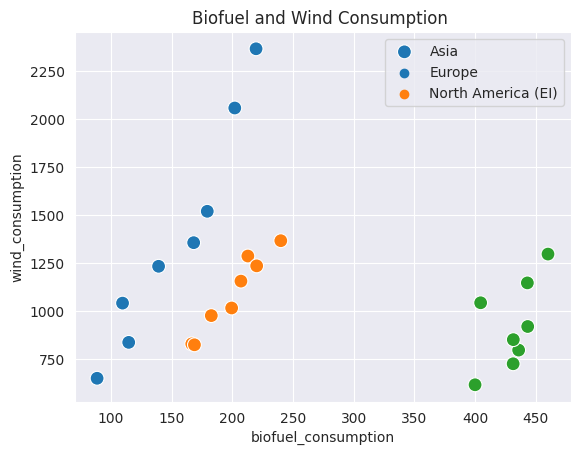

In [8]:
# Create a scatter plot
sns.scatterplot(x='biofuel_consumption',  # X-axis
                y='wind_consumption',  # Y-axis
                hue='country', 
                s=100,
                data=rows_df)
#create legend
plt.legend(labels=selected_continents)
# Chart title
plt.title("Biofuel and Wind Consumption ");

* **Line Plot**
-------------------------------------------------------------------------------------------

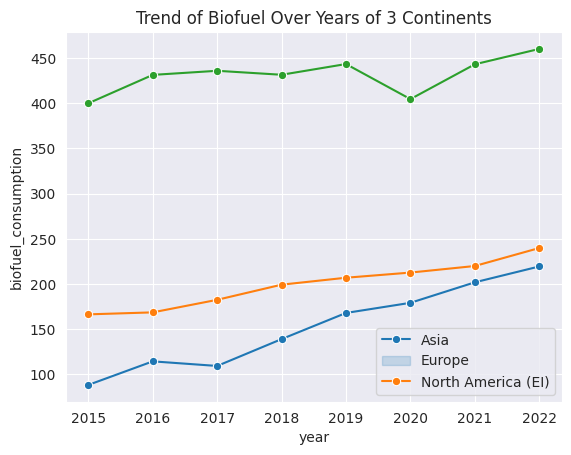

In [9]:
#create a line chart for biofuel consumptions

sns.lineplot(data=rows_df, x='year', y='biofuel_consumption', hue='country', marker='o')
plt.title("Trend of Biofuel Over Years of 3 Continents")
plt.legend(labels=selected_continents)
plt.show()

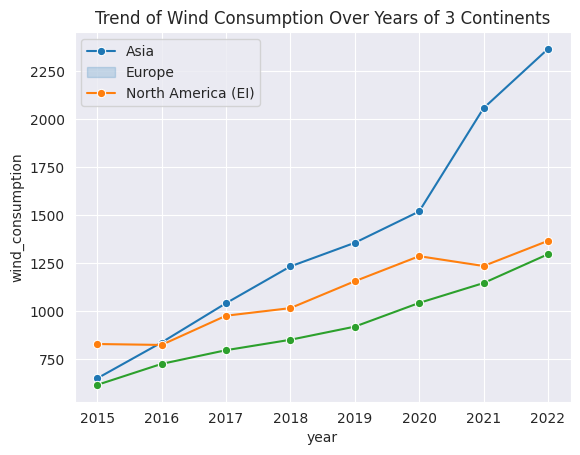

In [10]:
#create a line chart for wind consumptions
sns.lineplot(data=rows_df, x='year', y='wind_consumption', hue='country', marker='o')
plt.title("Trend of Wind Consumption Over Years of 3 Continents")
plt.legend(labels=selected_continents)
plt.show()

* **Histogram**
-------------------------------------------------------------------------------------------

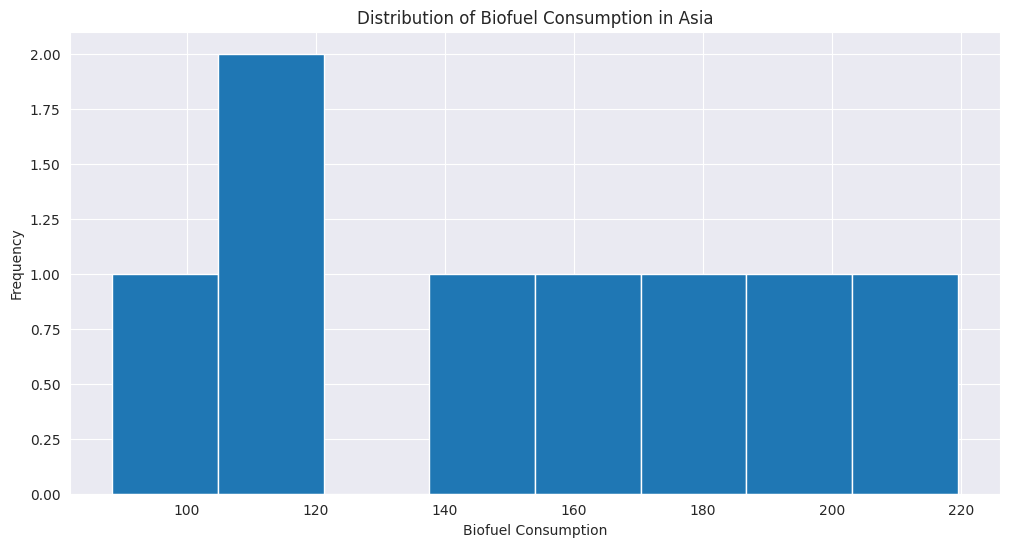

In [11]:
#Histogram for Distribution of Biofuel Consumption in Asia

plt.figure(figsize=(12, 6)) #increase the size of the graph
Asia_df = rows_df[rows_df.country == 'Asia']

#create histogram
plt.hist(Asia_df['biofuel_consumption'], bins=8, label='Asia')

#create axis lable
plt.xlabel('Biofuel Consumption')
plt.ylabel('Frequency')

#create title
plt.title('Distribution of Biofuel Consumption in Asia');

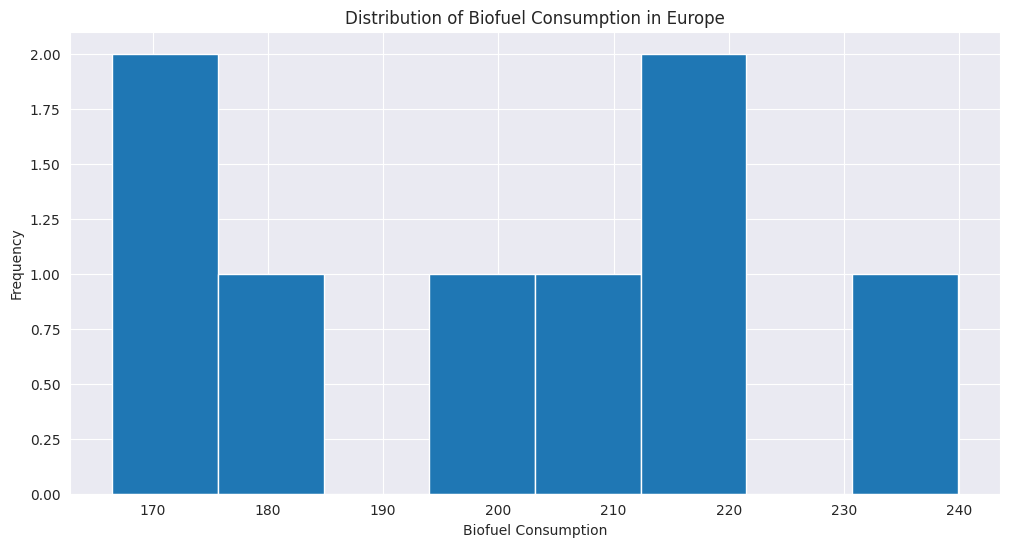

In [12]:
#Histogram for Distribution of Biofuel Consumption in Europe
plt.figure(figsize=(12, 6))
Europe_df = rows_df[rows_df.country == 'Europe']

#create histogram
plt.hist(Europe_df['biofuel_consumption'], bins=8, label='Europe')

#create label
plt.xlabel('Biofuel Consumption')
plt.ylabel('Frequency')

#create title
plt.title('Distribution of Biofuel Consumption in Europe');

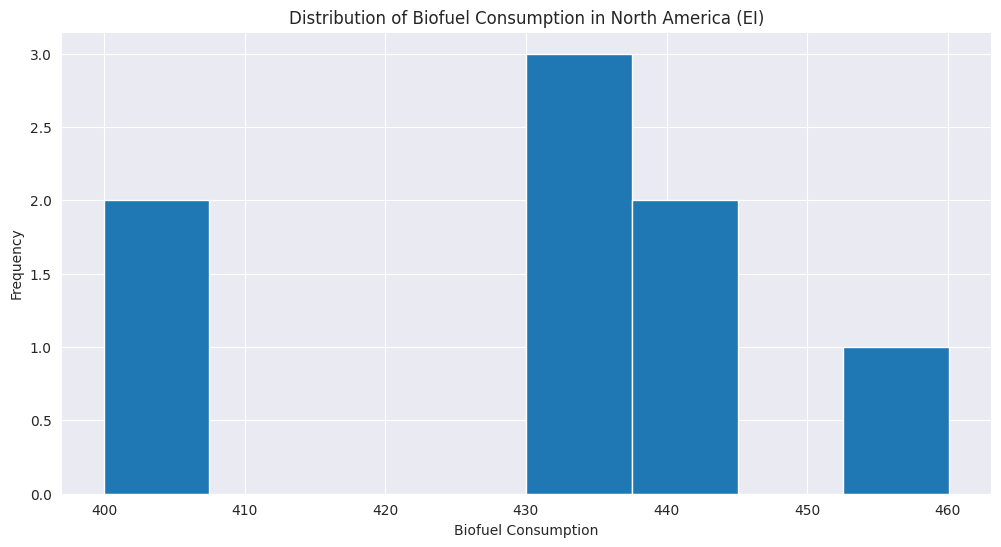

In [13]:
#Histogram for Distribution of Biofuel Consumption in North America
plt.figure(figsize=(12, 6))
NorthAm_df = rows_df[rows_df.country == 'North America (EI)']

#histogram
plt.hist(NorthAm_df['biofuel_consumption'], bins=8, label='North America (EI)')

#create label
plt.xlabel('Biofuel Consumption')
plt.ylabel('Frequency')

#create title
plt.title('Distribution of Biofuel Consumption in North America (EI)');

Text(0.5, 1.0, 'Distribution of Biofuel Consumption in Asia, Europe and North America (EI)')

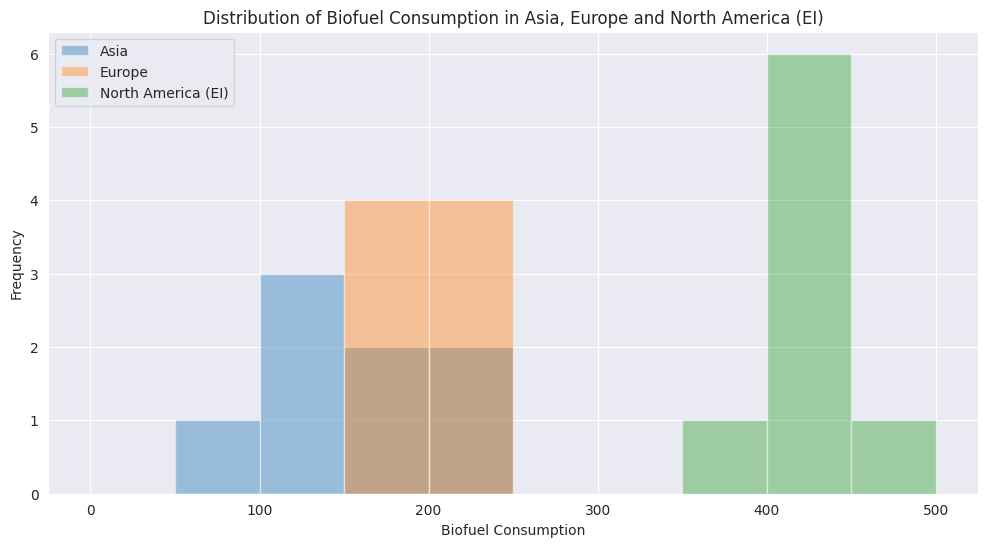

In [14]:
#create multiple histograms
plt.figure(figsize=(12, 6))
Asia_df = rows_df[rows_df.country == 'Asia']
Europe_df = rows_df[rows_df.country == 'Europe']
NorthAmerica_df = rows_df[rows_df.country == 'North America (EI)']

#for bins, use np.arange to set the boundaries (min,max,range)
plt.hist(Asia_df['biofuel_consumption'], alpha=0.4, bins=np.arange(0,550,50), label='Asia')
plt.hist(Europe_df['biofuel_consumption'], alpha=0.4, bins=np.arange(0,550,50), label='Europe')
plt.hist(NorthAmerica_df['biofuel_consumption'], alpha=0.4, bins=np.arange(0,550,50), label='North America (EI)')

plt.legend(selected_continents)
plt.xlabel('Biofuel Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Biofuel Consumption in Asia, Europe and North America (EI)')

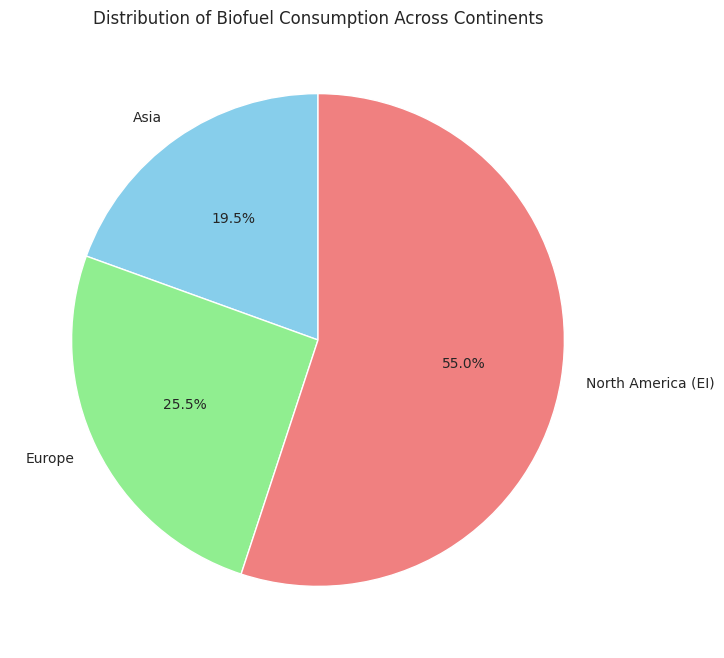

In [15]:
#piechart for distribution of biofuel consumptions
selected_continents = ['Asia', 'Europe', 'North America (EI)']
subset_df = rows_df[rows_df['country'].isin(selected_continents)]

# Calculate total biofuel consumption for each continent
total_biofuel_by_continent = subset_df.groupby('country')['biofuel_consumption'].sum()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_biofuel_by_continent, labels=total_biofuel_by_continent.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Biofuel Consumption Across Continents')
plt.show()

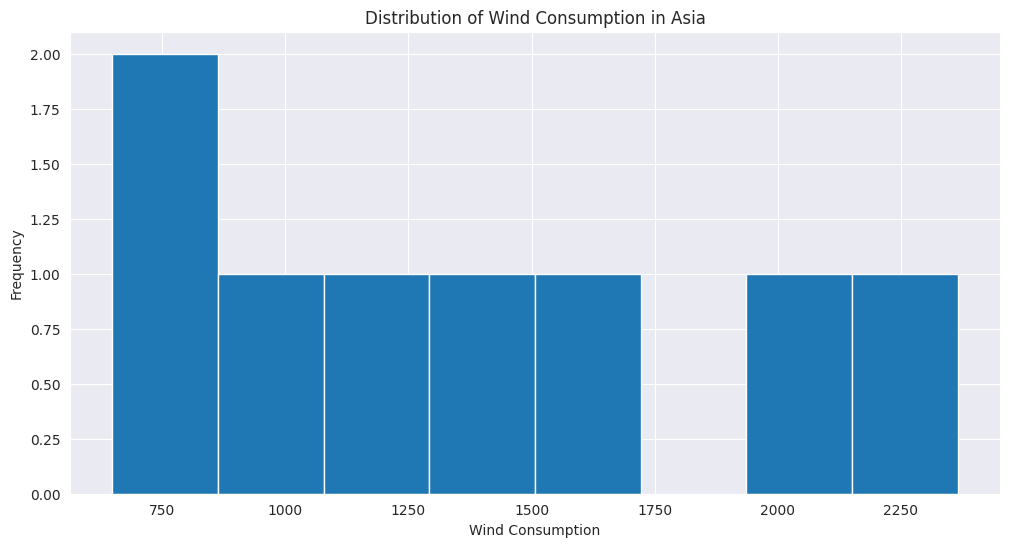

In [16]:
#Histogram for wind consumption in Asia
plt.figure(figsize=(12, 6))
Asia_df = rows_df[rows_df.country == 'Asia']
plt.hist(Asia_df['wind_consumption'], bins=8, label='Asia')

plt.xlabel('Wind Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Consumption in Asia');

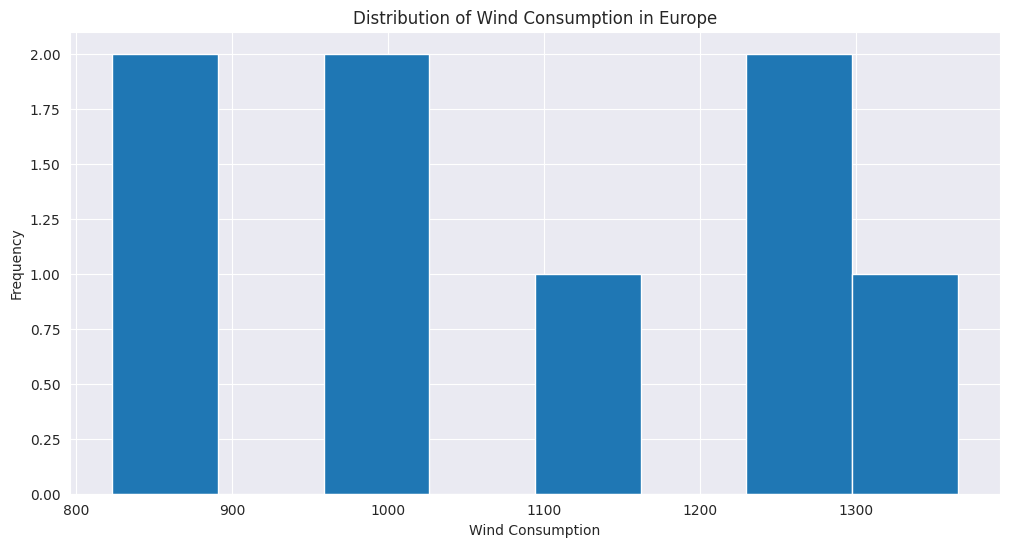

In [17]:
#Histogram for wind consumption in Europe
plt.figure(figsize=(12, 6))
Europe_df = rows_df[rows_df.country == 'Europe']
plt.hist(Europe_df['wind_consumption'], bins=8, label='Europe')
plt.xlabel('Wind Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Consumption in Europe');

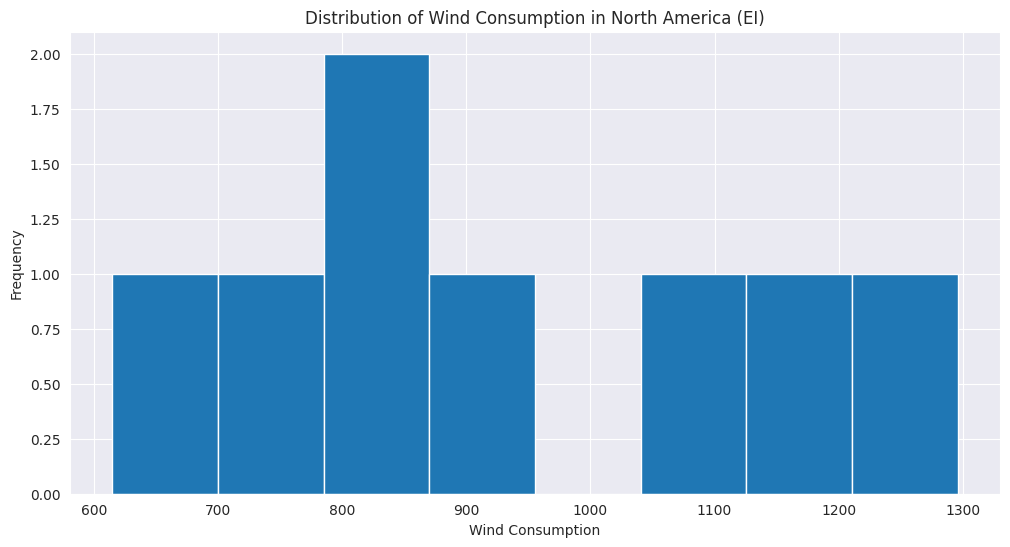

In [18]:
#Histogram for wind consumption in North America
plt.figure(figsize=(12, 6))
NorthAmerica_df = rows_df[rows_df.country == 'North America (EI)']
plt.hist(NorthAmerica_df['wind_consumption'], alpha=1, bins=8, label='North America (EI)')

plt.xlabel('Wind Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Consumption in North America (EI)');

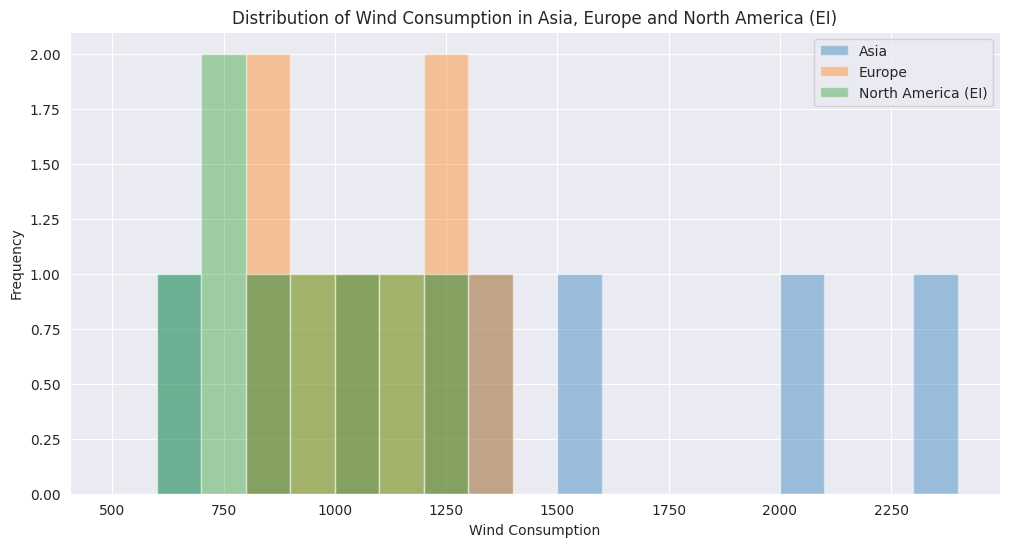

In [19]:
#Create multiple histograms
plt.figure(figsize=(12, 6))
Asia_df = rows_df[rows_df.country == 'Asia']
Europe_df = rows_df[rows_df.country == 'Europe']
NorthAmerica_df = rows_df[rows_df.country == 'North America (EI)']

#for bins, use np.arange to set the boundaries (min,max,range)
plt.hist(Asia_df['wind_consumption'], alpha=0.4, bins=np.arange(500,2500,100), label='Asia')
plt.hist(Europe_df['wind_consumption'], alpha=0.4, bins=np.arange(500,2500,100), label='Europe')
plt.hist(NorthAmerica_df['wind_consumption'], alpha=0.4, bins=np.arange(500,2500,100), label='North America')

plt.legend(selected_continents)
plt.xlabel('Wind Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Consumption in Asia, Europe and North America (EI)');

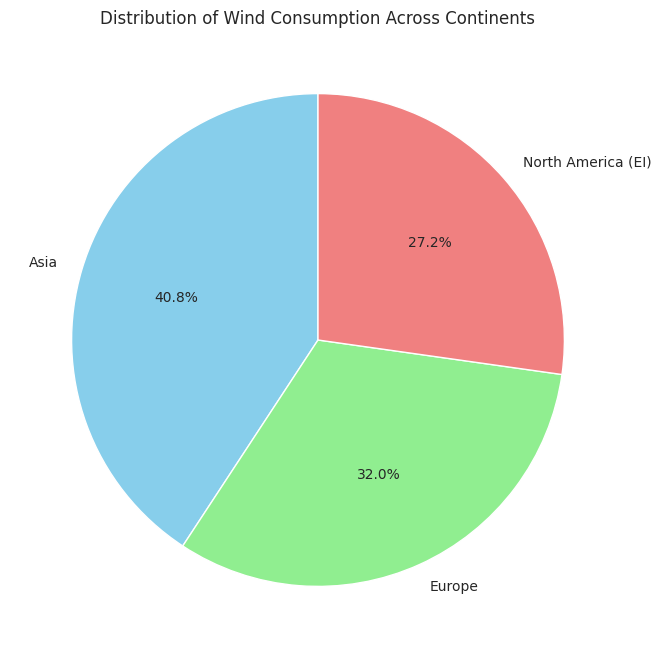

In [20]:
#create pie chart for distribution of wind consumption across continents
selected_continents = ['Asia', 'Europe', 'North America (EI)']
subset_df = rows_df[rows_df['country'].isin(selected_continents)]

# Calculate total wind consumption for each continent
total_wind_by_continent = subset_df.groupby('country')['wind_consumption'].sum()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_wind_by_continent, labels=total_wind_by_continent.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Wind Consumption Across Continents')
plt.show()

* **Bar Plots**
-------------------------------------------------------------------------------------------

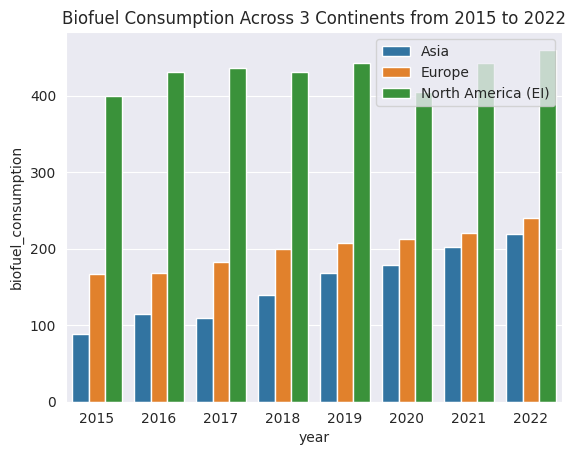

In [21]:
#create barplots for biofuel consumption across 3 continents
selected_continents = ['Asia', 'Europe', 'North America (EI)']
subset_df = rows_df[rows_df['country'].isin(selected_continents)]

sns.barplot(x='year', y='biofuel_consumption', hue='country', data=subset_df);
plt.title('Biofuel Consumption Across 3 Continents from 2015 to 2022')
plt.legend();

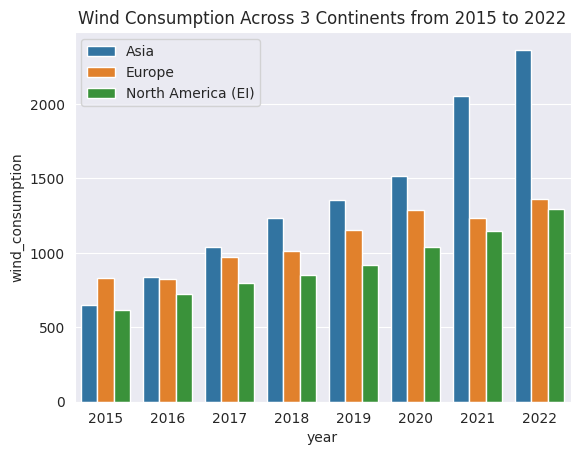

In [22]:
#create barplots for wind consumption across 3 continents
selected_continents = ['Asia', 'Europe', 'North America (EI)']
subset_df = rows_df[rows_df['country'].isin(selected_continents)]

sns.barplot(x='year', y='wind_consumption', hue='country', data=subset_df);
plt.title('Wind Consumption Across 3 Continents from 2015 to 2022')
plt.legend();

* **Box Plots**
-------------------------------------------------------------------------------------------

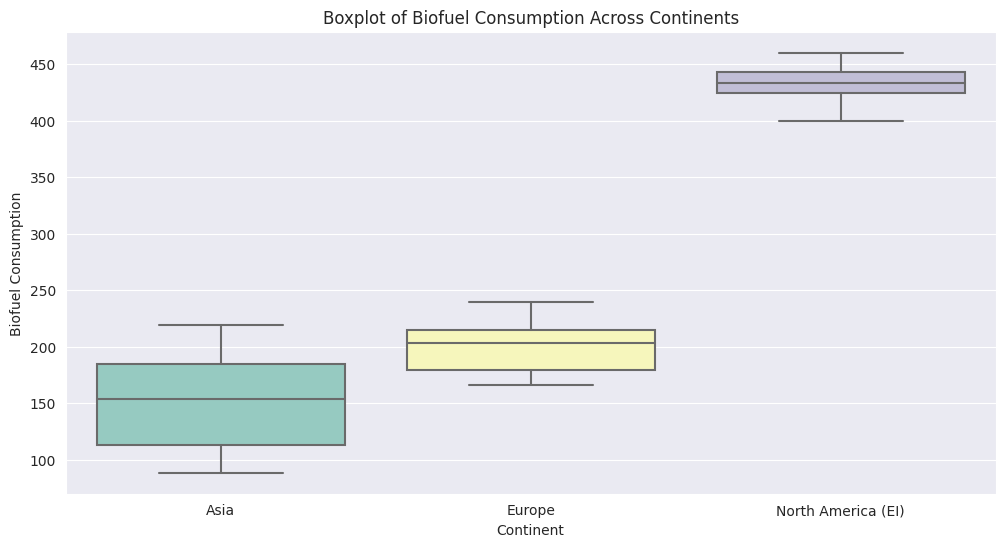

In [23]:
# create a boxplot of biofuel consumption across continents
selected_continents = ['Asia', 'Europe', 'North America (EI)']
subset_df = rows_df[rows_df['country'].isin(selected_continents)]

# Create a boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='biofuel_consumption', data=subset_df, palette='Set3')
plt.xlabel('Continent')
plt.ylabel('Biofuel Consumption')
plt.title('Boxplot of Biofuel Consumption Across Continents')
plt.show()

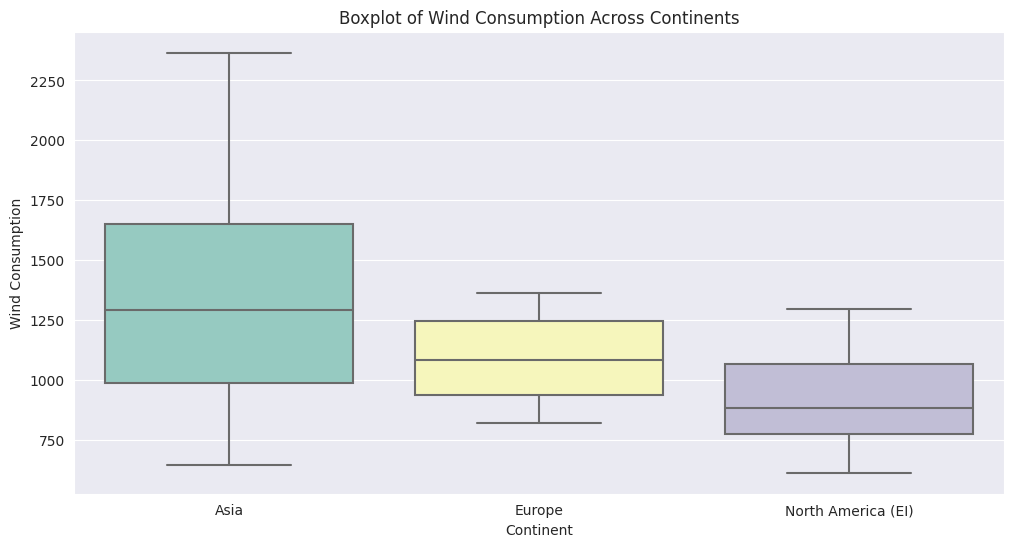

In [24]:
# create a boxplot of biofuel consumption across continents
selected_continents = ['Asia', 'Europe', 'North America (EI)']
subset_df = rows_df[rows_df['country'].isin(selected_continents)]

# Create a boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='wind_consumption', data=subset_df, palette='Set3')
plt.xlabel('Continent')
plt.ylabel('Wind Consumption')
plt.title('Boxplot of Wind Consumption Across Continents')
plt.show()

* **Pairplots**
----------------------------------------------------------------------------------------------------------------------------------------------------------

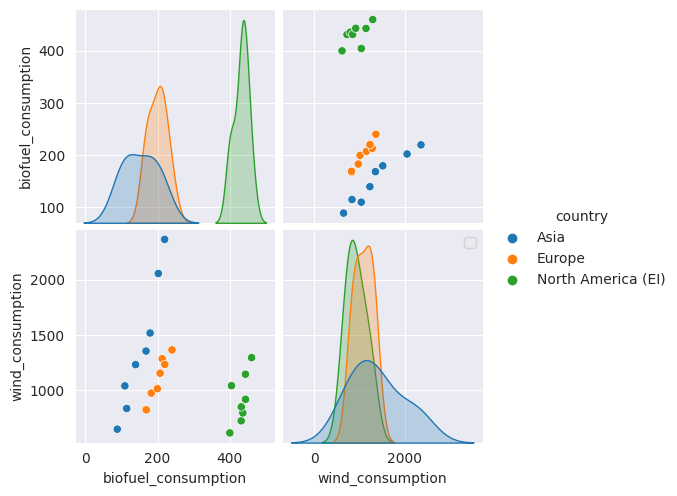

In [25]:
#create pairplots with seaborn
selected_variable=['biofuel_consumption','wind_consumption']
sns.pairplot(rows_df, hue='country', vars=selected_variable)
plt.legend();